In [730]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [731]:
# Connect to your database.
conn = sqlite3.connect('/home/sumkin/sumkin-trading/data/trades.db')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

# Number of trades.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades")
num_trades = cursor.fetchone()[0]

# Number of completed trades.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades WHERE active = 0")
num_completed_trades = cursor.fetchone()[0]

# Number of wins.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades WHERE active = 0 and return > 0")
num_win_trades = cursor.fetchone()[0]

# Win rate.
win_rate = num_win_trades / num_completed_trades

# Average return in pct.
cursor.execute("SELECT AVG(return) FROM cointegration_pair_trades WHERE active = 0")
avg_return = cursor.fetchone()[0]

# Averate return.
cursor.execute("SELECT SUM(return) FROM cointegration_pair_trades WHERE active = 0")
sum_return = cursor.fetchone()[0]

print("num_trades = {}".format(num_trades))
print("num_completed_trades = {}".format(num_completed_trades))
print("num_win_trades = {}".format(num_win_trades))
print("win_rate = {}".format(win_rate))
print("avg_return = {}".format(avg_return))
print("sum_return = {}".format(sum_return))

num_trades = 239
num_completed_trades = 223
num_win_trades = 137
win_rate = 0.6143497757847534
avg_return = 0.08617209846550258
sum_return = 19.216377957807076


In [732]:
df = pd.read_sql_query("SELECT * FROM cointegration_pair_trades", conn)
df["enter_dt"] = pd.to_datetime(df["enter_dt"])
df["exit_dt"] = pd.to_datetime(df["exit_dt"])
df["trade_length"] = (df["exit_dt"] - df["enter_dt"]).dt.total_seconds() / 60
df.sort_values("enter_dt", ascending=True, inplace=True)
df[df["active"] == 1].head(5)

,id,symb1,symb2,hedge,coeff,sigma,enter_dt,exit_dt,side,amnt,return_pct,return,active,p1_enter,p2_enter,p1_exit,p2_exit,trade_length
106,284,PF_POPCATUSD,PF_MOODENGUSD,0.578341,0.027149,0.002964,2025-10-08 06:06:00,NaT,SELL,4.320214,NaN,NaN,1,0.23147,0.15643,NaN,NaN,NaN
185,363,PF_CRVUSD,PF_PNUTUSD,0.265639,0.013686,0.003636,2025-10-09 18:06:04,NaT,SELL,1.380262,NaN,NaN,1,0.72450,0.20005,NaN,NaN,NaN
188,366,PF_CRVUSD,PF_JUPUSD,0.490840,0.079979,0.005370,2025-10-09 19:06:06,NaT,SELL,1.386770,NaN,NaN,1,0.72110,0.42400,NaN,NaN,NaN
196,374,PF_CRVUSD,PF_WIFUSD,1.156989,-0.120688,0.013388,2025-10-09 22:06:02,NaT,SELL,1.372495,NaN,NaN,1,0.72860,0.70000,NaN,NaN,NaN
215,393,PF_SEIUSD,PF_PYTHUSD,0.471942,0.023426,0.001574,2025-10-10 07:06:02,NaT,SELL,3.467767,NaN,NaN,1,0.28837,0.15651,NaN,NaN,NaN


# Return percentage distribution

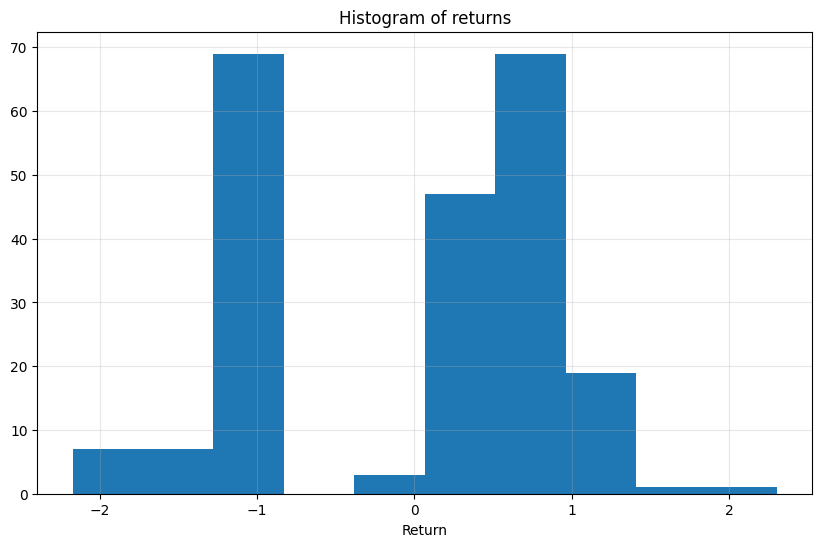

In [733]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["active"] == 0]["return_pct"])
plt.xlabel("Return")
plt.title("Histogram of returns")
plt.grid(True, alpha=0.3)
plt.show()

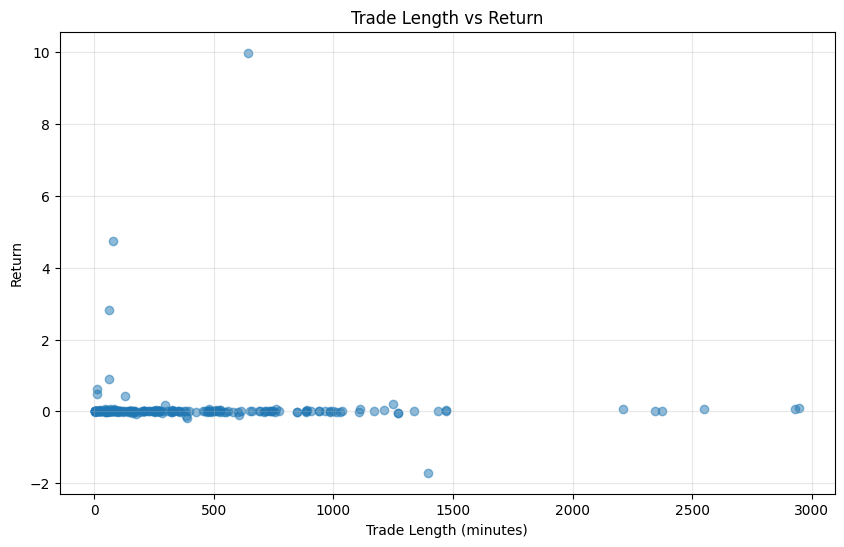

In [734]:
plt.figure(figsize=(10, 6))
plt.scatter(df["trade_length"], df["return"], alpha=0.5)
plt.xlabel("Trade Length (minutes)")
plt.ylabel("Return")
plt.title("Trade Length vs Return")
plt.grid(True, alpha=0.3)
plt.show()

#### 